# K means clustering for text document 

In [1]:
!pip install opendatasets -q

In [2]:
# dataset
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset'
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/sunilthite/text-document-classification-dataset


100%|██████████████████████████████████████████████████████████████████████████████| 1.85M/1.85M [00:01<00:00, 996kB/s]

##### dataset info 
- features text and label.
- Rows : 2225
- Columns : 2

**Label**

Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4

#### Clusterting these text data into labels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# read 
data  = pd.read_csv("text-document-classification-dataset/df_file.csv")
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [4]:
# counts labels data
print("Label 0 (Politics) --> ",len(data[data.Label == 0]))
print("Label 1 (Sport) --> ",len(data[data.Label == 1]))
print("Label 2 (Technology) --> ",len(data[data.Label == 2]))
print("Label 3 (Entertainment) --> ",len(data[data.Label == 3]))
print("Label 4 (Business) --> ",len(data[data.Label == 4]))

Label 0 (Politics) -->  417
Label 1 (Sport) -->  511
Label 2 (Technology) -->  401
Label 3 (Entertainment) -->  386
Label 4 (Business) -->  510


In [5]:
data['Text'][1][:300]

"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposal"

<br>
'Text' data needs some cleaning
<br>

- data cleaning

In [6]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_list = stopwords.words("english")

def clean_data(text):
    text = text.lower()                               # convert to lowercase
    text = text.replace("\n"," ").replace("\t"," ")   # replace \n and \t with space
    text = re.sub(r'\s+',' ',text)                    # removes one or more whitespaces
    text = re.sub(r'\d+', '', text)                   # removes digits
    text = re.sub(r'[^\w\s]', '', text)               # removes non-words
    
    # tokens
    tokens = word_tokenize(text)
    
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
        
    return " ".join(data)

In [7]:
text_data = data['Text'].apply(clean_data)
text_data[1]

'army chiefs regiments decision military chiefs expected meet make final decision future scotlands army regiments committee army board made senior defence figures discuss plans restructuring regiments monday proposals include cutting scotlands six singlebattalion regiments five merging super regiment plans faced stiff opposition campaigners politicians alike committees decision must ratified defence secretary geoff hoon prime minister tony blair expected made public next week ministers announced reorganisation army drew question mark futures black watch kings scottish borderers royal scots royal highland fusiliers argyll sutherland highlanders october council scottish colonels proposed merger royal scots kings scottish borderers single battalion vision would one five new super regiment proposals either merge amalgamate six regiments super regiment sparked political outcry labour backbenchers opposition politicians opposing plan felt timing insensitive black watch frontline iraq sufferi

#### Convert these text data into vectors with TFIDF

In [8]:
# create tfidf with 5-grams
tfidf = TfidfVectorizer(ngram_range=(1,5)) # can also pass stop_words here
t0 = time()
train_vec = tfidf.fit_transform(text_data)

print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 3.850 s


In [9]:
train_vec.shape

(2225, 1635251)

In [10]:
train_vec.A # array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
type(train_vec)

scipy.sparse._csr.csr_matrix

In [13]:
terms = tfidf.get_feature_names_out()
terms[:8]

array(['aa', 'aa motoring', 'aa motoring trust', 'aa motoring trust said',
       'aa motoring trust said sure', 'aaa', 'aaa battery',
       'aaa battery said'], dtype=object)

#### K means with inertia

In [14]:
inertia_list = []
for cluster in range(1,12):
    model = KMeans(n_clusters = cluster, init='k-means++')
    model.fit(train_vec)
    inertia_list.append(model.inertia_)

In [15]:
inertia_list

[2215.639456674425,
 2212.310603639933,
 2211.080210632621,
 2208.0971251134015,
 2205.3921163474106,
 2203.2435726405047,
 2203.349856754443,
 2201.1874921022772,
 2198.751128660214,
 2197.22391160152,
 2194.2112418319225]

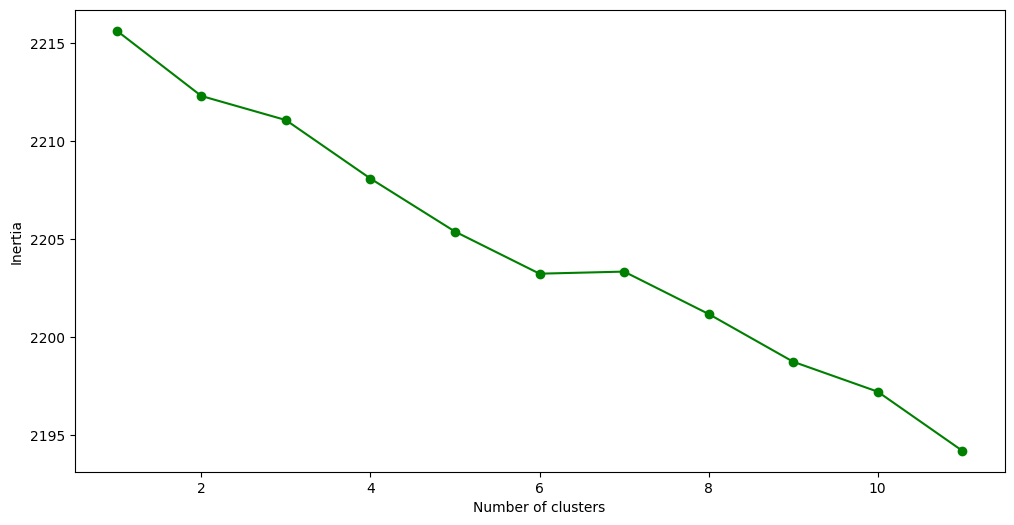

In [17]:
# plotting
frame = pd.DataFrame({'Cluster':range(1,12), 'inertia':inertia_list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['inertia'], marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##### K means with 5 cluster 

In [21]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(train_vec)
pred = kmeans.predict(train_vec)

In [22]:
frame = pd.DataFrame(train_vec)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
4    564
1    552
2    436
0    364
3    309
Name: count, dtype: int64

In [24]:
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)

In [25]:
print(f"{cluster_ids} --> {cluster_sizes}")

[0 1 2 3 4] --> [364 552 436 309 564]


In [26]:
pred.shape

(2225,)

In [27]:
len(pred) # same as len(kmeans.labels_)

2225

In [37]:
csr_ = train_vec[pred == 0]  # doc id, term number __ score/val
print(csr_[1, :])

  (0, 961289)	0.05053974758010849
  (0, 259326)	0.05053974758010849
  (0, 240492)	0.05053974758010849
  (0, 911450)	0.05053974758010849
  (0, 55111)	0.05053974758010849
  (0, 659396)	0.05053974758010849
  (0, 300823)	0.05053974758010849
  (0, 1211662)	0.05053974758010849
  (0, 439201)	0.05053974758010849
  (0, 222250)	0.05053974758010849
  (0, 998404)	0.05053974758010849
  (0, 444773)	0.05053974758010849
  (0, 229319)	0.05053974758010849
  (0, 269347)	0.05053974758010849
  (0, 349129)	0.05053974758010849
  (0, 221315)	0.05053974758010849
  (0, 1342107)	0.05053974758010849
  (0, 366684)	0.05053974758010849
  (0, 1342115)	0.05053974758010849
  (0, 426579)	0.05053974758010849
  (0, 1149638)	0.05053974758010849
  (0, 1381143)	0.05053974758010849
  (0, 1184822)	0.05053974758010849
  (0, 1010277)	0.05053974758010849
  (0, 1047218)	0.05053974758010849
  :	:
  (0, 659381)	0.024004855413276748
  (0, 1522430)	0.03763282693245865
  (0, 1520597)	0.03774524164494924
  (0, 444698)	0.0346134156510564

<br>

**As we have high dimentional data, we need to do dimentionaltity reduction**


#### Dimentionality Reduction using TruncatedSVD

In [38]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(train_vec)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 42.042 s
Explained variance of the SVD step: 9.9%


- Now lets see

In [39]:
train_vec.shape

(2225, 1635251)

In [40]:
X_lsa.shape

(2225, 100)

- get unique predictions

In [41]:
u_pred = np.unique(pred)
u_pred

array([0, 1, 2, 3, 4], dtype=int32)

#### Plotting reduced data

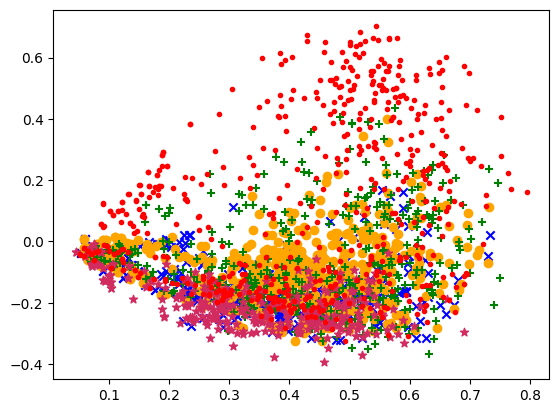

In [43]:
filtered_0 = X_lsa[pred == 0]
filtered_1 = X_lsa[pred == 1]
filtered_2 = X_lsa[pred == 2]
filtered_3 = X_lsa[pred == 3]
filtered_4 = X_lsa[pred == 4]
 
plt.scatter(filtered_0[:,0] , filtered_0[:,1] , color = 'blue', marker='x')
plt.scatter(filtered_1[:,0] , filtered_1[:,1] , color = 'orange', marker='o')
plt.scatter(filtered_2[:,0] , filtered_2[:,1] , color = 'green', marker='+')
plt.scatter(filtered_3[:,0] , filtered_3[:,1] , color = '#D12B60', marker='*')
plt.scatter(filtered_4[:,0] , filtered_4[:,1] , color = 'red', marker='.')
plt.show()

- plot with 3d

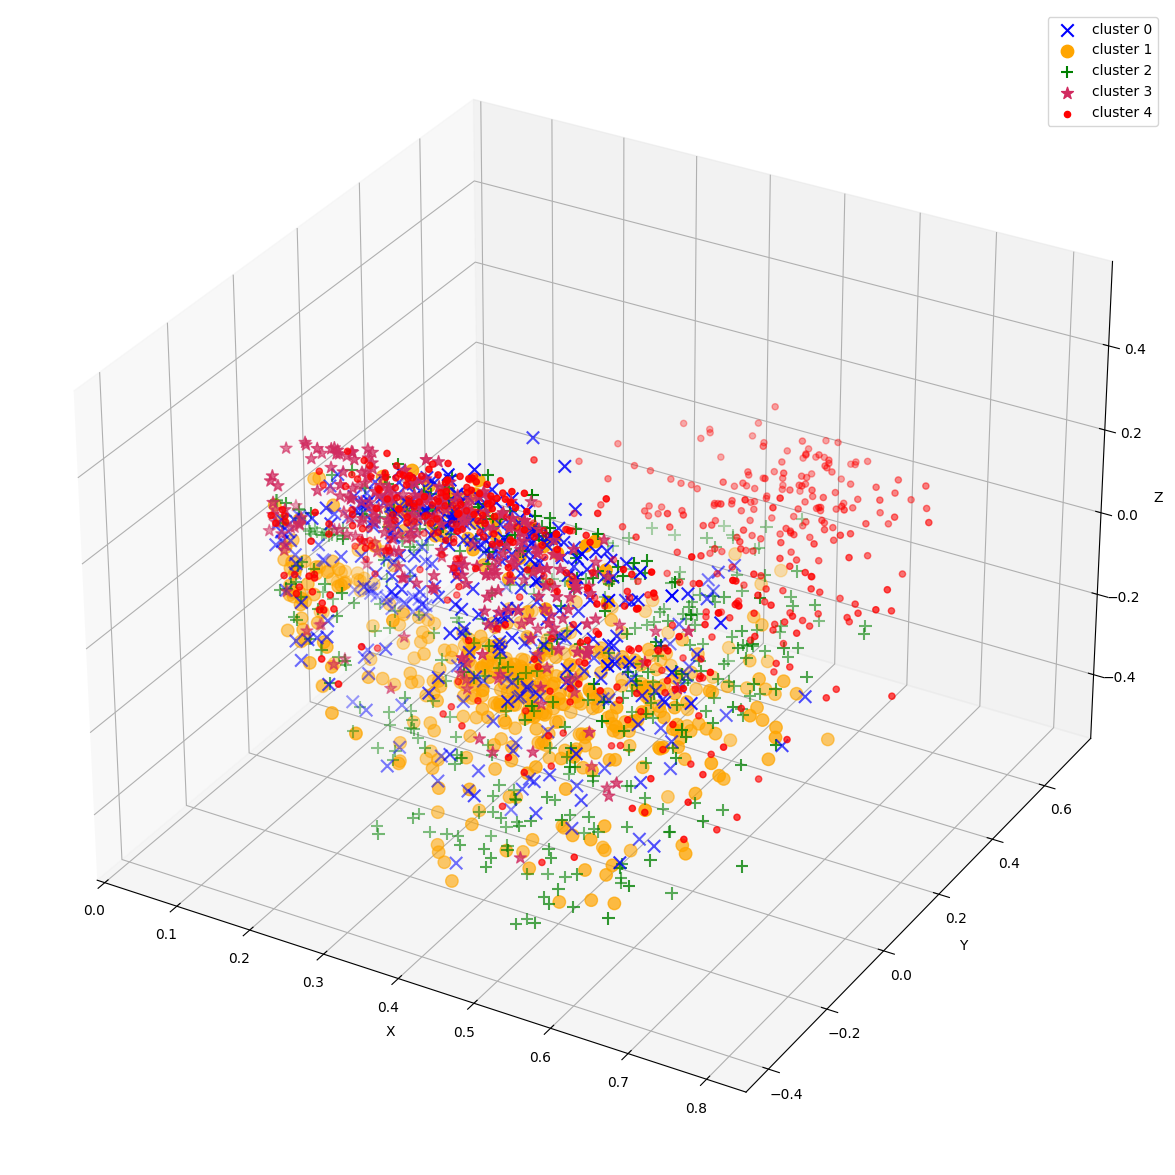

In [44]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lsa[pred == 0,0],X_lsa[pred == 0,1],X_lsa[pred == 0,2], s = 80 , color = 'blue', marker='x', label = "cluster 0")
ax.scatter(X_lsa[pred == 1,0],X_lsa[pred == 1,1],X_lsa[pred == 1,2], s = 80 , color = 'orange', marker='o', label = "cluster 1")
ax.scatter(X_lsa[pred == 2,0],X_lsa[pred == 2,1],X_lsa[pred == 2,2], s = 80 , color = 'green', marker='+', label = "cluster 2")
ax.scatter(X_lsa[pred == 3,0],X_lsa[pred == 3,1],X_lsa[pred == 3,2], s = 80 , color = '#D12B60', marker='*', label = "cluster 3")
ax.scatter(X_lsa[pred == 4,0],X_lsa[pred == 4,1],X_lsa[pred == 4,2], s = 80 , color = 'red', marker='.', label = "cluster 4")
# ax.scatter(centroids[:,0] , centroids[:,1], centroids[:,2] , s = 80, color = 'black', label="Centroids") 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()